In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress

import pylab

import random

def f(y,w):
    #function used later in the code......will be multiplied by a time to give a position and velocity.
    return np.array([y[1],-(w**2)*y[0]])

## The Harmonic Oscillator

Acceleration is related to the position by the equation $\ddot{x}=-\omega^2x(t)$. Below, I'll try and write a code that uses Euler's Method to approximate a position output.

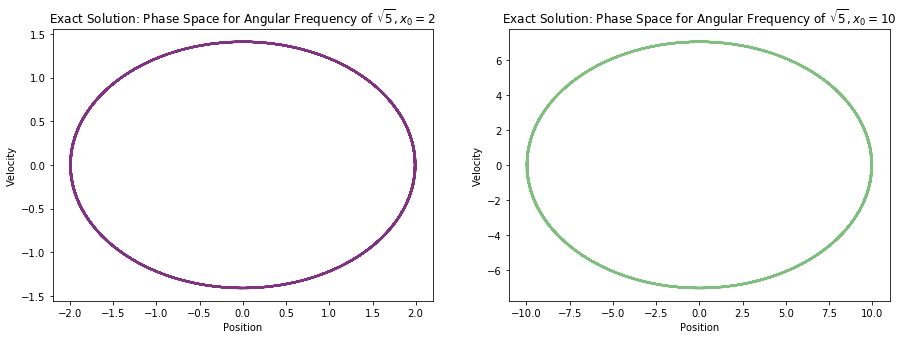

In [2]:
x_values = np.linspace(0,100*np.pi, 1000)
y_values_1 = 2*np.cos(x_values*np.sqrt(0.5))

plt.rcParams['figure.figsize']=15,5

plt.subplot(1, 2, 1)

plt.xlabel('Position')

plt.ylabel('Velocity')

plt.title('Exact Solution: Phase Space for Angular Frequency of $\sqrt{5}, x_0=2$')

v_values_1 = -np.sqrt(0.5)*2*np.sin(np.sqrt(0.5)*x_values)

plt.plot(y_values_1, v_values_1, color = (0.5, 0.2, 0.5), linestyle = '-')

plt.subplot(1, 2, 2)

y_values_2 = 10*np.cos(x_values*np.sqrt(0.5))

plt.xlabel('Position')

plt.ylabel('Velocity')

plt.title('Exact Solution: Phase Space for Angular Frequency of $\sqrt{5}, x_0=10$')

v_values_2 = -np.sqrt(0.5)*10*np.sin(np.sqrt(0.5)*x_values)

plt.plot(y_values_2, v_values_2, color = (0.5, 0.75, 0.5), linestyle = '-')


In [5]:
def HarmEuler(x0,v0,Time,dt,w):
    
    x=x0
    
    xlist=[]
    
    vlist=[]
    
    v=v0
    
    tlist=np.arange(0,Time+dt,dt)
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        vlist.append(v)
        
        x=x+dt*v
        
        v=v-dt*previousx*w**2
        
    return [[plt.plot(tlist, xlist, label=str(dt), color=(random.random(), random.random(), random.random()))]]

[0, 30, -8, 8]

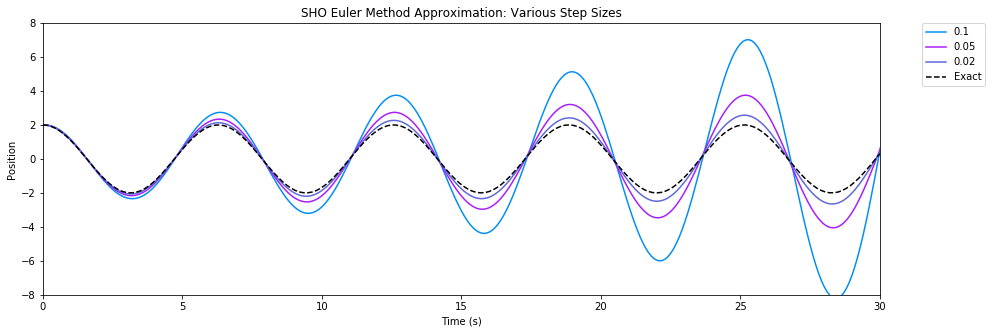

In [6]:
x0=2

v0=0

Time=100

w=1

HarmEuler(x0, v0, Time, 0.1, w)

HarmEuler(x0, v0, Time, 0.05, w)

HarmEuler(x0, v0, Time, 0.02, w)

x_values = np.linspace(0, 30, 200)

y_values = 2*np.cos(x_values)

plt.plot(x_values, y_values, 'black', linestyle = '--', label="Exact")

plt.xlabel('Time (s)')

plt.ylabel('Position')

plt.title('SHO Euler Method Approximation: Various Step Sizes')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['figure.figsize']=15,5

plt.axis([0, 30, -8, 8])

In [9]:
def HarmEulerPSpace(x0,v0,Time,dt,w):
    
    x=x0
    
    xlist=[]
    
    v=v0
    
    vlist=[]
    
    tlist=np.arange(0,Time+dt,dt)
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        vlist.append(v)
        
        x=x+dt*v
        
        v=v-dt*previousx*w**2
        
    return [[plt.plot(xlist, vlist, label = str(dt), color = (random.random(), random.random(), random.random()))]]

[-25, 25, -25, 25]

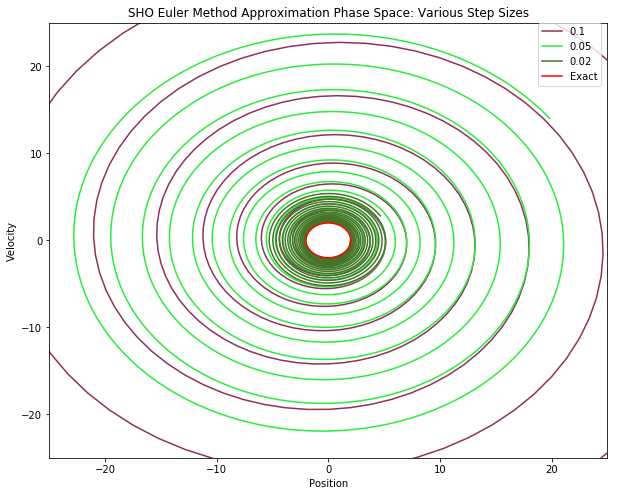

In [11]:
x0=2

v0=0

Time=100

w=1

HarmEulerPSpace(x0, v0, Time, 0.1, w)

HarmEulerPSpace(x0, v0, Time, 0.05, w)

HarmEulerPSpace(x0, v0, Time, 0.02, w)

list_radians = [0]

for i in range(0,360):
    
    float_div = 180.0/(i+1)
    
    list_radians.append(np.pi/float_div)
     
list_x2_axis = []

list_y2_axis = []
 
for a in list_radians:
    
    list_x2_axis.append(2*np.cos(a))
    
    list_y2_axis.append(2*np.sin(a))

plt.xlim(-1.5,1.5)

plt.ylim(-1.5,1.5)

plt.plot(list_x2_axis,list_y2_axis,"black", c='r',label="Exact")

plt.xlabel('Position')

plt.ylabel('Velocity')

plt.title('SHO Euler Method Approximation Phase Space: Various Step Sizes')

plt.legend(bbox_to_anchor=(.875, 1), loc=2, borderaxespad=0.)

plt.rcParams['figure.figsize']=10, 8

plt.axis([-25, 25, -25, 25])

In [14]:
def HarmEulerEplot(x0,v0,Time,dt,w):
    
    x=x0
    
    xlist=[]
    
    v=v0
    
    vlist=[]
    
    Elist=[]
    
    tlist=np.arange(0, Time + dt, dt)
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        vlist.append(v)
        
        Elist.append(0.5*np.square(v)+0.5*np.square(x))
        
        x=x+dt*v
        
        v=v-dt*previousx*w**2
        
    return [[plt.plot(tlist, Elist, label = str(dt), color = (random.random(), random.random(), random.random()))]]

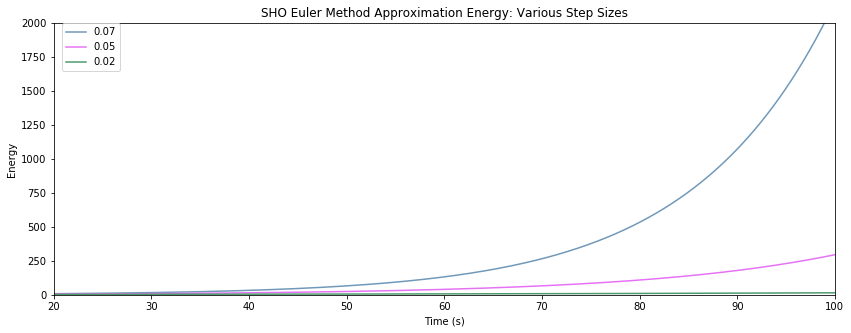

In [16]:
x0=2
v0=0
Time=100
w=1

HarmEulerEplot(x0, v0, Time, 0.07, w)

HarmEulerEplot(x0, v0, Time, 0.05, w)

HarmEulerEplot(x0, v0, Time, 0.02, w)

plt.axis([20, 100, 0, 2000])

plt.xlabel('Time (s)')

plt.ylabel('Energy')

plt.title('SHO Euler Method Approximation Energy: Various Step Sizes')

plt.legend(bbox_to_anchor=(0.01, 1), loc=2, borderaxespad=0.)

plt.rcParams['figure.figsize']=14, 5

In [18]:
def RK2(x0, v0, Time, dt,w):
    
    #y is just an array to keep track of x and velocity
    
    position_list=[]
    
    velocity_list=[]
    
    energy_list=[]
    
    y=np.array([x0, v0])
    
    time_list=np.arange(0,Time+dt,dt)
    
    for i in time_list:
        
        position_list.append(y[0])
        
        velocity_list.append(y[1])
        
        energy_list.append(0.5*(y[0]**2)+0.5*4*(y[1]**2))
        
        #Just to update the first entry
        #Our equations that tell us how to step, can be swapped out later in RK4
        
        k1=dt*f(y,w)
    
        k2=dt*f(y+k1/2,w)
        
        #Step
        
        y=y+k2
        
        #Then, the above line just updates y, using an RK step; within y, there is a position and velocity. Both these
        #are updated, since f(y) returns a velocity and acceleration. The position is the final x list, which is then
        #converted into an array for plotting purposes.
        
    return plt.plot(time_list, position_list, color = (random.random(), random.random(), random.random()), linestyle = '-')

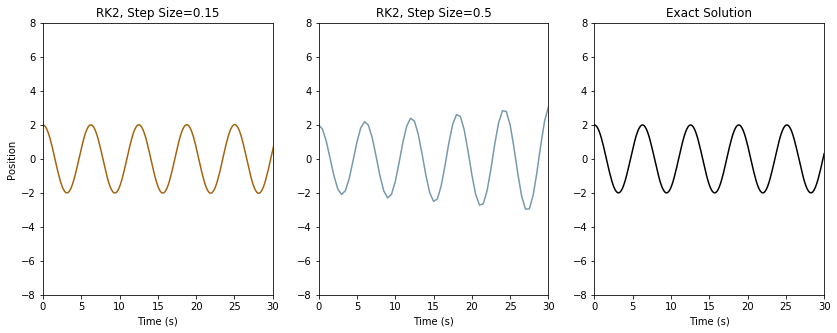

In [19]:
x0=2

v0=0

Time=300

w=1

plt.rcParams['figure.figsize']=14, 5

plt.subplot(1,3,1)

plt.ylabel('Position')

RK2(x0, v0, Time, 0.15, w)

plt.axis([0, 30, -8, 8])

plt.title('RK2, Step Size=0.15')

plt.xlabel('Time (s)')

#

plt.subplot(1,3,2)

RK2(x0, v0, Time, 0.5, w)

plt.axis([0, 30, -8, 8])

plt.title('RK2, Step Size=0.5')

plt.xlabel('Time (s)')

#

plt.subplot(1,3,3)

x_values = np.linspace(0, 30, 200)

y_values = 2*np.cos(x_values)

plt.plot(x_values, y_values, 'black', linestyle = '-', label="Exact")

plt.xlabel('Time (s)')

plt.title('Exact Solution')

plt.axis([0, 30, -8, 8])

pylab.savefig('p5.jpg')

In [20]:
def RK2Energy(x0, v0, Time, dt,w):
    
    position_list=[]
    
    velocity_list=[]
    
    energy_list=[]
    
    y = np.array([x0, v0])
    
    time_list=np.arange(0,Time+dt,dt)
    
    for i in time_list:
        
        position_list.append(y[0])
        
        velocity_list.append(y[1])
        
        energy_list.append(0.5*(y[0]**2)+0.5*(y[1]**2))
        
        k1=dt*f(y,w)
    
        k2=dt*f(y+k1/2,w)
        
        y=y+k2
        
    return plt.plot(time_list, energy_list, color = (random.random(), random.random(), random.random()), linestyle = '-',label=str(dt))

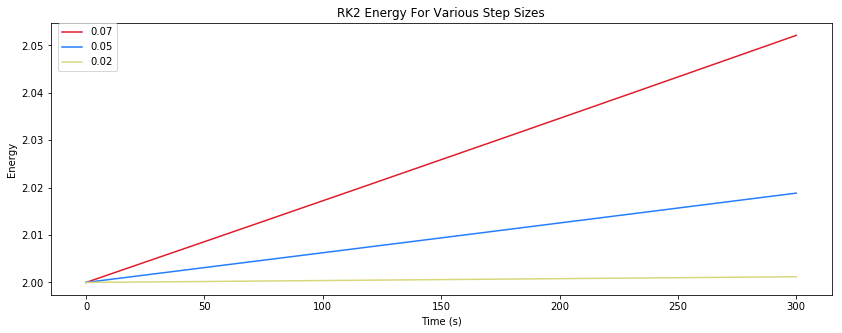

In [21]:
RK2Energy(x0, v0, Time, 0.07, w)

RK2Energy(x0, v0, Time, 0.05, w)

RK2Energy(x0, v0, Time, 0.02, w)

plt.legend(bbox_to_anchor=(0.01, 1), loc=2, borderaxespad=0.)

plt.xlabel('Time (s)')

plt.ylabel('Energy')

plt.title('RK2 Energy For Various Step Sizes')

pylab.savefig('p6.jpg')

In [22]:
def RK2Phase(x0, v0, Time, dt,w):
    
    position_list=[]
    
    velocity_list=[]
    
    energy_list=[]
    
    y=np.array([x0, v0])
    
    time_list=np.arange(0,Time+dt, dt)
    
    for i in time_list:
        
        position_list.append(y[0])
        
        velocity_list.append(y[1])
        
        energy_list.append(0.5*(y[0]**2)+0.5*(y[1]**2))
        
        k1=dt*f(y,w)
    
        k2=dt*f(y+k1/2,w)
        
        y=y+k2
      
    return plt.plot(position_list, velocity_list, color = (random.random(), random.random(), random.random()), linestyle = '-',label=str(dt))

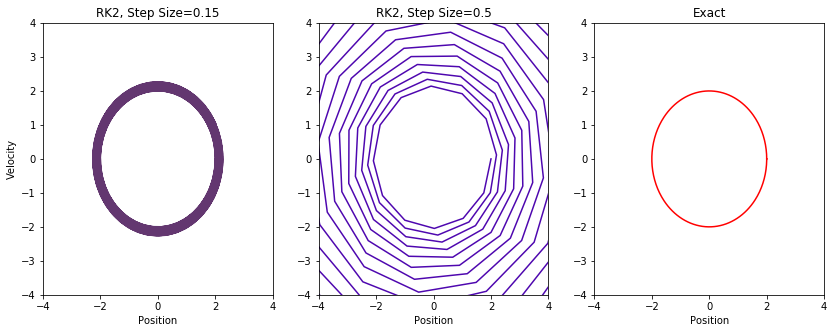

In [23]:
plt.rcParams['figure.figsize']=14, 5

plt.subplot(1,3,1)

RK2Phase(x0, v0, Time, 0.15, w)

plt.title('RK2, Step Size=0.15')

plt.axis([-4, 4, -4, 4])

plt.xlabel('Position')

plt.ylabel('Velocity')

#

plt.subplot(1,3,2)

RK2Phase(x0, v0, Time, 0.5, w)

plt.title('RK2, Step Size=0.5')

plt.axis([-4, 4, -4, 4])

plt.xlabel('Position')

#

plt.subplot(1,3,3)

list_radians = [0]

for i in range(0,360):
    
    float_div = 180.0/(i+1)
    
    list_radians.append(np.pi/float_div)
     
list_x2_axis = []

list_y2_axis = []
 
for a in list_radians:
    
    list_x2_axis.append(2*np.cos(a))
    
    list_y2_axis.append(2*np.sin(a))

plt.xlim(-1.5,1.5)

plt.ylim(-1.5,1.5)

plt.plot(list_x2_axis,list_y2_axis,"black", c='r',label="Exact")

plt.title('Exact')

plt.xlabel('Position')

plt.axis([-4, 4, -4, 4])

pylab.savefig('p7.jpg')

In [24]:
 def RK4(x0, v0, Time, dt, w):
    
    #y is just an array to keep track of the initial x and velocity
    
    position_list=[]
    
    velocity_list=[]
    
    energy_list=[]
    
    y = np.array([x0, v0])
    
    time_list=np.arange(0,Time+dt,dt)
    
    for i in time_list:
        
        position_list.append(y[0])
        
        velocity_list.append(y[1])
        
        energy_list.append(0.5*(y[0]**2)+0.5*4*(y[1]**2))
        
        k1=dt*f(y,w)
    
        k2=dt*f(y + k1/2,w)
        
        k3=dt*f(y+k2/2,w)
        
        k4=dt*f(y+k3,w)
        
        y=y+k1/6+k2/3+k3/3+k4/6
        
    return plt.plot(time_list, position_list, color = (random.random(), random.random(), random.random()), linestyle = '-')

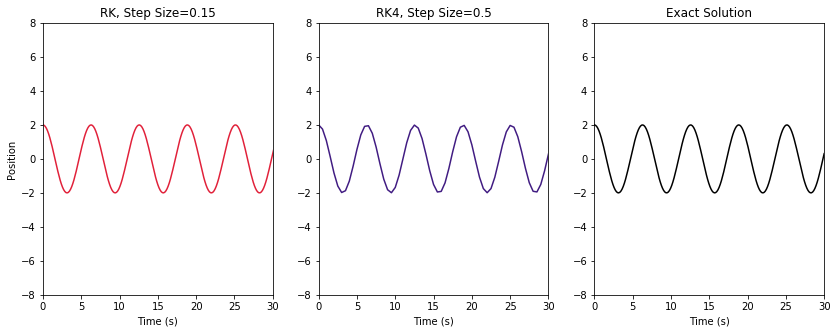

In [25]:
plt.rcParams['figure.figsize']=14, 5

plt.subplot(1,3,1)

plt.ylabel('Position')

plt.xlabel('Time (s)')

RK4(x0, v0, Time, 0.15, w)

plt.axis([0, 30, -8, 8])

plt.title('RK, Step Size=0.15')

#

plt.subplot(1,3,2)

RK4(x0, v0, Time, 0.5, w)

plt.axis([0, 30, -8, 8])

plt.title('RK4, Step Size=0.5')

plt.xlabel('Time (s)')

#

plt.subplot(1,3,3)

x_values = np.linspace(0, 30, 200)

y_values = 2*np.cos(x_values)

plt.plot(x_values, y_values, 'black', linestyle = '-', label="Exact")

plt.xlabel('Time (s)')

plt.title('Exact Solution')

plt.axis([0, 30, -8, 8])

pylab.savefig('p8.jpg')

In [26]:
def RK4Energy(x0, v0, Time, dt, w):
    
    position_list=[]
    
    velocity_list=[]
    
    energy_list=[]
    
    y = np.array([x0, v0])
    
    time_list = np.arange(0,Time+dt, dt)
    
    for i in time_list:
        
        position_list.append(y[0])
        
        velocity_list.append(y[1])
        
        energy_list.append(0.5*(y[0]**2)+0.5*(y[1]**2))
        
        k1=dt*f(y,w)
    
        k2=dt*f(y + k1/2,w)
        
        k3=dt*f(y+k2/2,w)
        
        k4=dt*f(y+k3,w)
        
        y=y+k1/6+k2/3+k3/3+k4/6

    return plt.plot(time_list, energy_list, color = (random.random(), random.random(), random.random()), linestyle = '-',label=str(dt))

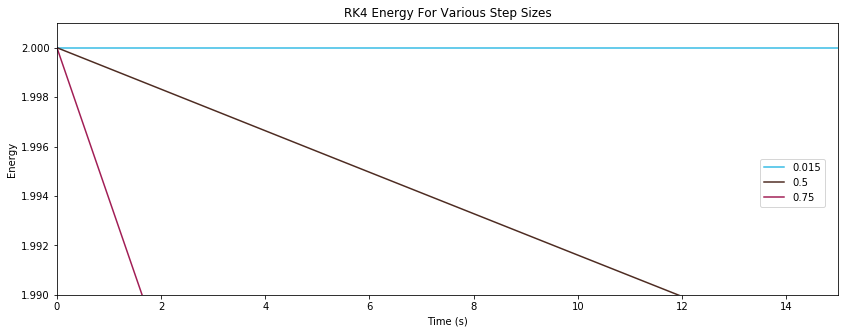

In [28]:
Time=100 (#This took a long time at 1000, so I just redefined it)

RK4Energy(x0, v0, Time, .015, w)
    
RK4Energy(x0, v0, Time, 0.5, w)
    
RK4Energy(x0, v0, Time, 0.75, w)

plt.legend(bbox_to_anchor=(.9, .5), loc=2, borderaxespad=0.)

plt.xlabel('Time (s)')
    
plt.ylabel('Energy')
    
plt.title('RK4 Energy For Various Step Sizes')

plt.axis([0, 15, 1.99, 2.001])

pylab.savefig('p9.jpg')

In [30]:
def RK4Phase(x0, v0, Time, dt, w):
    
    position_list=[]
    
    velocity_list=[]
    
    energy_list=[]
    
    y=np.array([x0, v0])
    
    time_list=np.arange(0,Time+dt, dt)
    
    for i in time_list:
        
        position_list.append(y[0])
        
        velocity_list.append(y[1])
        
        energy_list.append(0.5*(y[0]**2)+0.5*(y[1]**2))
        
        k1=dt*f(y,w)
    
        k2=dt*f(y + k1/2,w)
        
        k3=dt*f(y+k2/2,w)
        
        k4=dt*f(y+k3,w)
        
        y=y+k1/6+k2/3+k3/3+k4/6

    return plt.plot(position_list, velocity_list, color = (random.random(), random.random(), random.random()), linestyle = '-',label=str(dt))

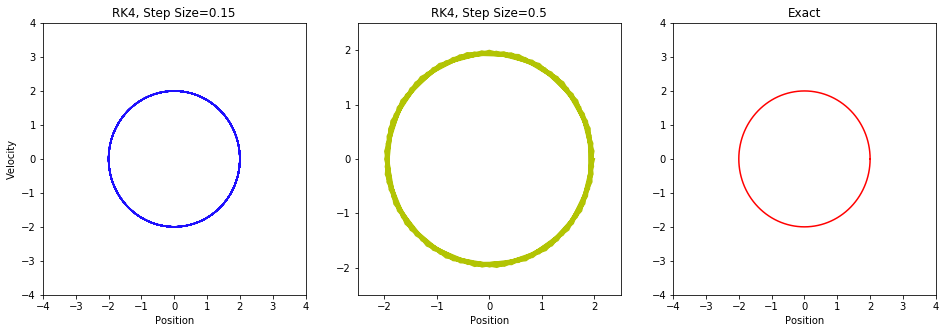

In [31]:
plt.rcParams['figure.figsize']=16, 5

plt.subplot(1,3,1)

RK4Phase(x0, v0, Time, 0.1, w)

plt.title('RK4, Step Size=0.15')

plt.axis([-4, 4, -4, 4])

plt.xlabel('Position')

plt.ylabel('Velocity')

#
plt.subplot(1,3,2)

RK4Phase(x0, v0, Time, 0.5, w)

plt.title('RK4, Step Size=0.5')

plt.axis([-2.5, 2.5, -2.5, 2.5])

plt.xlabel('Position')

#
plt.subplot(1,3,3)

list_radians = [0]

for i in range(0,360):
    
    float_div = 180.0/(i+1)
    
    list_radians.append(np.pi/float_div)
     
list_x2_axis = []

list_y2_axis = []
 
for a in list_radians:
    
    list_x2_axis.append(2*np.cos(a))
    
    list_y2_axis.append(2*np.sin(a))

plt.xlim(-1.5,1.5)

plt.ylim(-1.5,1.5)

plt.plot(list_x2_axis,list_y2_axis,"black", c='r',label="Exact")

plt.title('Exact')

plt.xlabel('Position')

plt.axis([-4, 4, -4, 4])

pylab.savefig('p10.jpg')

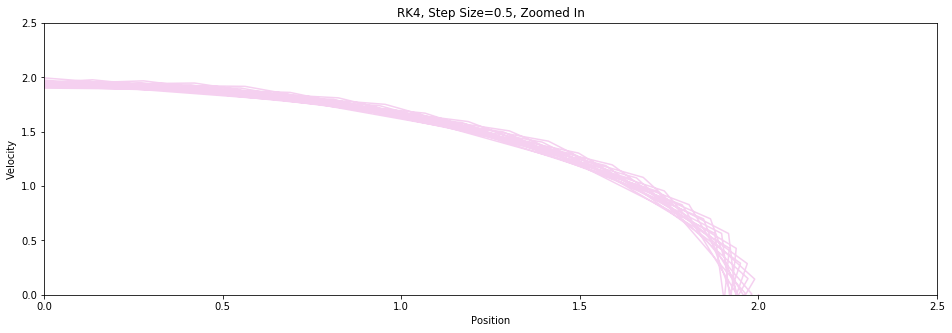

In [32]:
RK4Phase(x0, v0, Time, 0.5, w)

plt.title('RK4, Step Size=0.5, Zoomed In')

plt.axis([0, 2.5, 0, 2.5])

plt.rcParams['figure.figsize']=10, 10

plt.xlabel('Position')

plt.ylabel('Velocity')

pylab.savefig('p11.jpg')


In [33]:
def SE1(x0, v0, Time, dt, w):
    
    v=v0
    
    x=x0
    
    xlist=[]
    
    tlist=np.arange(0,Time+dt,dt) 
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        x=x+dt*(v+dt*(x*(-w**2)))
        
        v=v+dt*(-w**2*previousx)
    
    return plt.plot(tlist, xlist, label =str(dt), color = (random.random(), random.random(), random.random()))

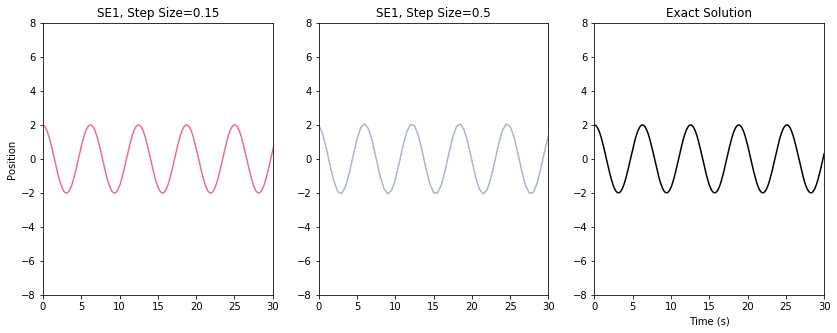

In [34]:
Time=300

plt.rcParams['figure.figsize']=14, 5

plt.subplot(1,3,1)

plt.ylabel('Position')

SE1(x0, v0, Time, 0.15, w)

plt.axis([0, 30, -8, 8])

plt.title('SE1, Step Size=0.15')

#
plt.subplot(1,3,2)

SE1(x0, v0, Time, 0.5, w)

plt.axis([0, 30, -8, 8])

plt.title('SE1, Step Size=0.5')

#
plt.subplot(1,3,3)

x_values = np.linspace(0, 30, 200)

y_values = 2*np.cos(x_values)

plt.plot(x_values, y_values, 'black', linestyle = '-', label="Exact")


plt.xlabel('Time (s)')

plt.title('Exact Solution')

plt.axis([0, 30, -8, 8])

pylab.savefig('p12.jpg')

In [35]:
def SE1Energy(x0, v0, Time, dt, w):
    
    v=v0
    
    x=x0
    
    xlist=[]
    
    tlist=np.arange(0,Time+dt,dt)
    
    Elist=[]
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        x=x+dt*(v+dt*(x*(-w**2)))
        
        v=v+dt*(-w**2*previousx)
        
        Elist.append(0.5*np.square(v)+0.5*np.square(x))
    
    return plt.plot(tlist, Elist, label =str(dt), color = (random.random(), random.random(), random.random()))

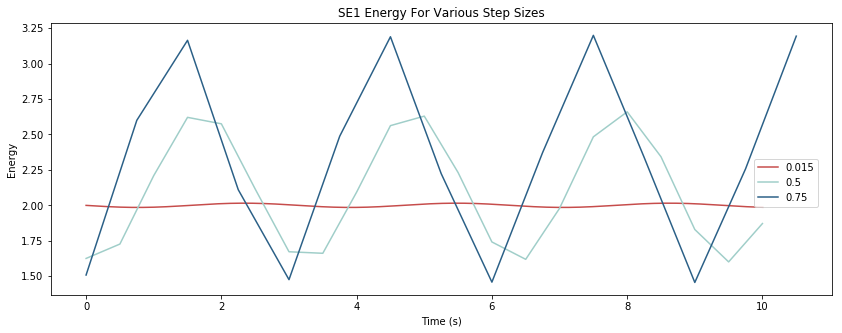

In [36]:
Time=10

SE1Energy(x0, v0, Time, .015, w)

SE1Energy(x0, v0, Time, 0.5, w)

SE1Energy(x0, v0, Time, 0.75, w)

plt.legend(bbox_to_anchor=(.9, .5), loc=2, borderaxespad=0.)

plt.xlabel('Time (s)')

plt.ylabel('Energy')

plt.title('SE1 Energy For Various Step Sizes')

pylab.savefig('p13.jpg')

In [37]:
def SE1Phase(x0, v0, Time, dt, w):
    
    #returns x vs. v
    
    v=v0
    
    x=x0
    
    xlist=[]
    
    vlist=[]
    
    tlist=np.arange(0,Time+dt,dt) 
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        vlist.append(v)
        
        x=x+dt*(v+dt*(x*(-w**2)))
        
        v=v+dt*(-w**2*previousx)
    
    return plt.plot(xlist, vlist, label =str(dt), color = (random.random(), random.random(), random.random()))

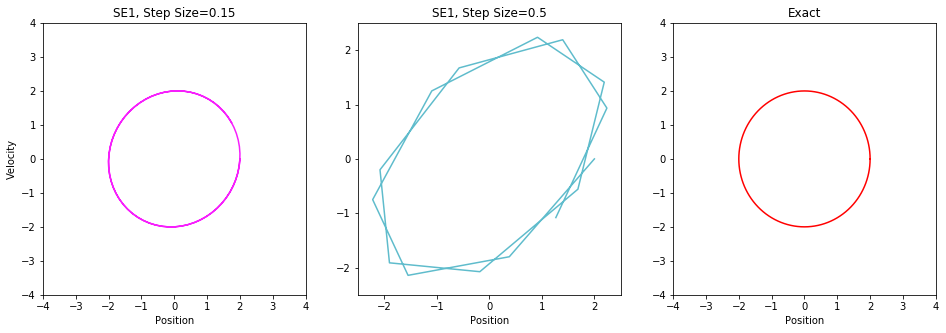

In [38]:
Time=12

plt.rcParams['figure.figsize']=16, 5

plt.subplot(1,3,1)

SE1Phase(x0, v0, Time, 0.1, w)

plt.title('SE1, Step Size=0.15')

plt.axis([-4, 4, -4, 4])

plt.xlabel('Position')

plt.ylabel('Velocity')

#

plt.subplot(1,3,2)

SE1Phase(x0, v0, Time, 0.9, w)

plt.title('SE1, Step Size=0.5')

plt.axis([-2.5, 2.5, -2.5, 2.5])

plt.xlabel('Position')

#

plt.subplot(1,3,3)

list_radians = [0]

for i in range(0,360):
    
    float_div = 180.0/(i+1)
    
    list_radians.append(np.pi/float_div)
     
list_x2_axis = []

list_y2_axis = []
 
for a in list_radians:
    
    list_x2_axis.append(2*np.cos(a))
    
    list_y2_axis.append(2*np.sin(a))

plt.xlim(-1.5,1.5)

plt.ylim(-1.5,1.5)

plt.plot(list_x2_axis,list_y2_axis,"black", c='r',label="Exact")

plt.title('Exact')

plt.xlabel('Position')

plt.axis([-4, 4, -4, 4])

pylab.savefig('p14.jpg')

In [39]:
def SE2Phase(x0, v0, Time, dt, w):
    
    #Just returns a different set of x,y (x=x, y=velocity) 
    
    v=v0
    
    x=x0
    
    xlist=[]
    
    vlist=[]
    
    tlist=np.arange(0,Time+dt,dt)
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        vlist.append(v)
        
        x=x+dt*(v+dt*(previousx*(-w**2)))
        
        v=v+dt*(-w**2*x)
    
    return plt.plot(xlist, vlist, label =str(dt), color = (random.random(), random.random(), random.random()))

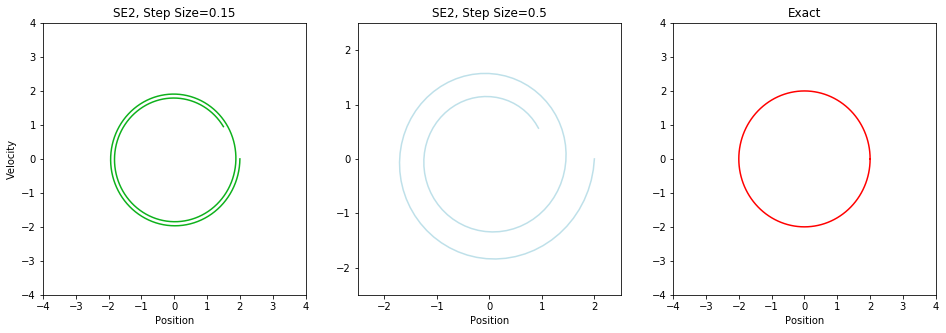

In [40]:
Time=12

plt.rcParams['figure.figsize']=16, 5

plt.subplot(1,3,1)

SE2Phase(x0, v0, Time, 0.02, w)

plt.title('SE2, Step Size=0.15')

plt.axis([-4, 4, -4, 4])

plt.xlabel('Position')

plt.ylabel('Velocity')

#
plt.subplot(1,3,2)

SE2Phase(x0, v0, Time, 0.1, w)

plt.title('SE2, Step Size=0.5')

plt.axis([-2.5, 2.5, -2.5, 2.5])

plt.xlabel('Position')

#
plt.subplot(1,3,3)

list_radians = [0]

for i in range(0,360):
    float_div = 180.0/(i+1)
    list_radians.append(np.pi/float_div)
     
list_x2_axis = []
list_y2_axis = []
 
for a in list_radians:
    list_x2_axis.append(2*np.cos(a))
    list_y2_axis.append(2*np.sin(a))

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.plot(list_x2_axis,list_y2_axis,"black", c='r',label="Exact")

plt.title('Exact')

plt.xlabel('Position')

plt.axis([-4, 4, -4, 4])

pylab.savefig('p15.jpg')

In [41]:
def SE2Energy(x0, v0, Time, dt, w):
    
    #just returns a different set of x,y (x=time, y=Energy)
    
    v=v0
    
    x=x0
    
    xlist=[]
    
    vlist=[]
    
    Elist=[]
    
    tlist = np.arange(0,Time+dt,dt)
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        vlist.append(v)
        
        x=x+dt*(v+dt*(previousx*(-w**2)))
        
        v=v+dt*(-w**2*x)
        
        Elist.append(0.5*np.square(v)+0.5*np.square(x))
    
    return plt.plot(tlist, Elist, label =str(dt), color = (random.random(), random.random(), random.random()))

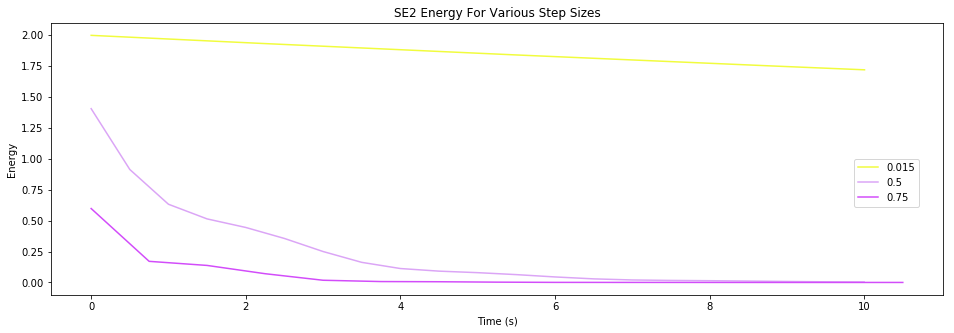

In [42]:
Time=10

SE2Energy(x0, v0, Time, .015, w)

SE2Energy(x0, v0, Time, 0.5, w)

SE2Energy(x0, v0, Time, 0.75, w)

plt.legend(bbox_to_anchor=(.9, .5), loc=2, borderaxespad=0.)

plt.xlabel('Time (s)')

plt.ylabel('Energy')

plt.title('SE2 Energy For Various Step Sizes')

pylab.savefig('p16.jpg')

In [43]:
def SE2(x0, v0, Time, dt, w):
    
    #return t vs. x
    
    v=v0
    
    x=x0
    
    xlist=[]
    
    vlist=[]
    
    tlist=np.arange(0,Time+dt, dt)
    
    for i in tlist:
        
        previousx=x
        
        xlist.append(x)
        
        vlist.append(v)
        
        x=x+dt*(v+dt*(previousx*(-w**2)))
        
        v=v+dt*(-w**2*x)
    
    return plt.plot(tlist, xlist, label =str(dt), color = (random.random(), random.random(), random.random()))

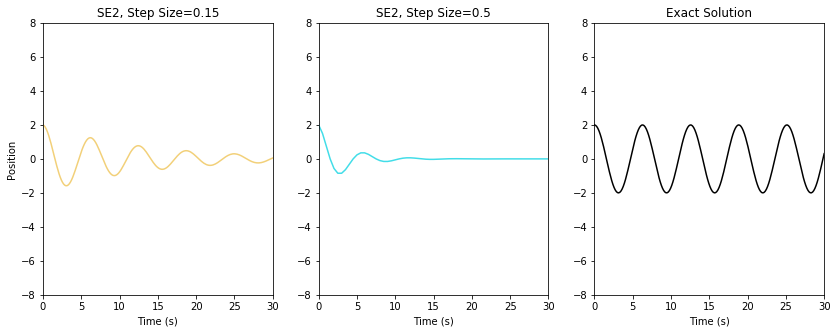

In [44]:
Time=300

plt.rcParams['figure.figsize']=14, 5

plt.subplot(1,3,1)

plt.ylabel('Position')

SE2(x0, v0, Time, 0.15, w)

plt.axis([0, 30, -8, 8])

plt.title('SE2, Step Size=0.15')

plt.xlabel('Time (s)')

#

plt.subplot(1,3,2)

SE2(x0, v0, Time, 0.5, w)

plt.axis([0, 30, -8, 8])

plt.title('SE2, Step Size=0.5')

plt.xlabel('Time (s)')

#

plt.subplot(1,3,3)

x_values = np.linspace(0, 30, 200)

y_values = 2*np.cos(x_values)

plt.plot(x_values, y_values, 'black', linestyle = '-', label="Exact")


plt.xlabel('Time (s)')

plt.title('Exact Solution')

plt.axis([0, 30, -8, 8])

pylab.savefig('p17.jpg')

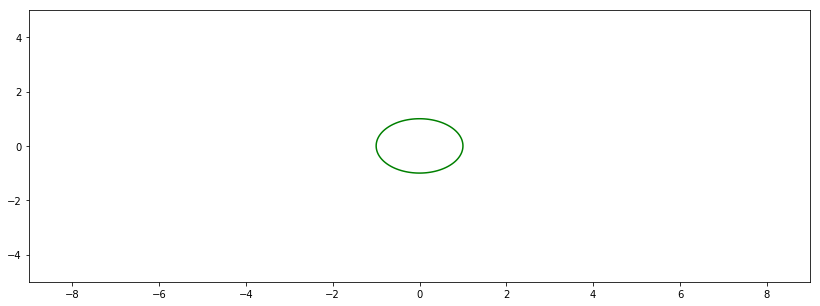

In [45]:
x = np.linspace(-9, 9, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)
a = 1.
b = 1.
plt.contour(x, y,(x**2/a**2 + y**2/b**2), [1], colors='green')
plt.show()

In [56]:
def SE1KeplerOrbits(x_0, vx_0, y_0, vy_0, Time, dt):
    
    pvector=[x_0,y_0]
    
    vvector=[vx_0, vy_0]
    
    xposition=[]
    
    yposition=[]
    
    amomentum=[]
    
    time_array=np.arange(0,(Time+dt)/dt,dt)
    
    for i in time_array:
        
        amomentum.append(pvector[0]*vvector[1]-pvector[1]*vvector[0])
        
        xposition.append(pvector[0])
        
        yposition.append(pvector[1])
        
        #the update here follows the SE1 pattern, where position is updated first, then velocity is updated based on the position
        #information.
        
        xupdate=pvector[0]+dt*(vvector[0]-dt*pvector[0]/((pvector[0]**2+pvector[1]**2)**(3/2)))
        
        yupdate=pvector[1]+dt*(vvector[1]-dt*pvector[1]/((pvector[1]**2+pvector[0]**2)**(3/2)))
        
        vvector[0]+= dt*-(pvector[0]/((pvector[0]**2+pvector[1]**2)**(3/2)))
        
        vvector[1]+= dt*-(pvector[1]/((pvector[0]**2+pvector[1]**2)**(3/2)))
        
        pvector=[xupdate, yupdate]
        
    return [xposition, yposition, amomentum, time_array]

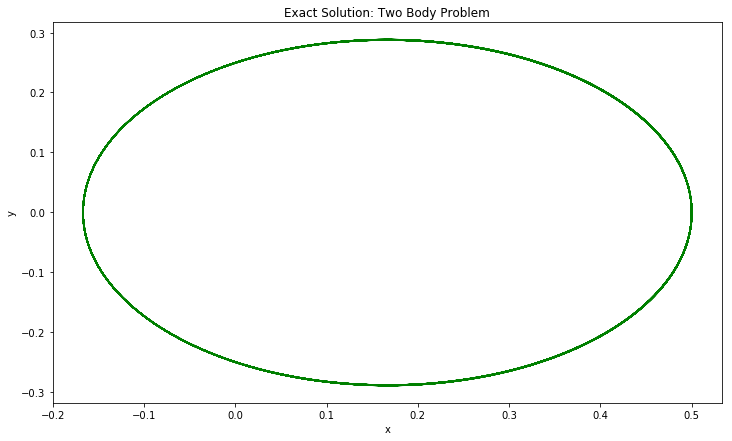

In [57]:
result=SE1KeplerOrbits(0.5, 0, 0, 1, 0.05, 0.001)

plt.rcParams['figure.figsize']=12,7

plt.plot(result[0], result[1], color = 'Green', linestyle = '-')

plt.title('Exact Solution: Two Body Problem')

plt.xlabel('x')

plt.ylabel('y')

pylab.savefig('p18.jpg')

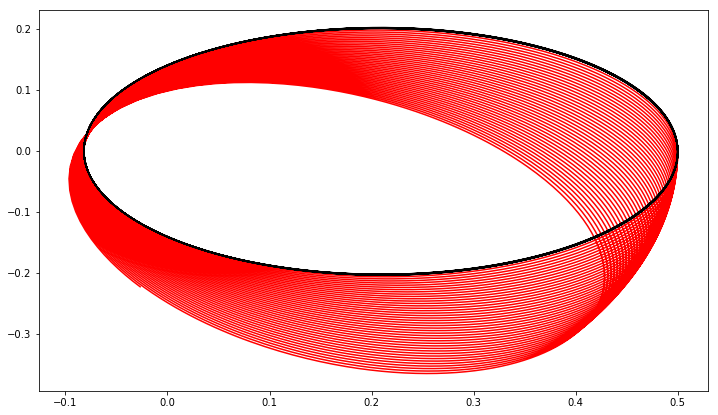

In [58]:
result2=SE1KeplerOrbits(0.5, 0, 0, 0.75, 0.2, 0.005)

result2exact=SE1KeplerOrbits(0.5, 0, 0, 0.75, 0.01, 0.001)

plt.rcParams['figure.figsize']=12,7

plt.plot(result2[0], result2[1], color = 'Red', linestyle = '-')

plt.plot(result2exact[0], result2exact[1], color = 'Black', linestyle = '-')

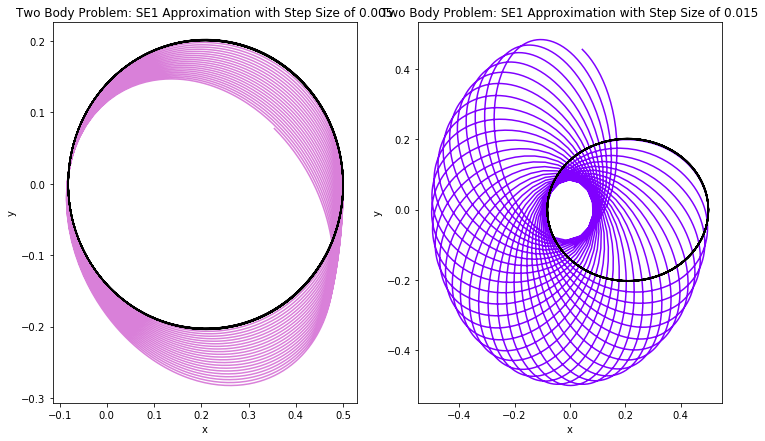

In [49]:
plt.subplot(1,2,1)

result2=SE1KeplerOrbits(0.5, 0, 0, 0.75, 0.1, 0.005)

result2exact=SE1KeplerOrbits(0.5, 0, 0, 0.75, 0.01, 0.001)

plt.rcParams['figure.figsize']=19,7

plt.plot(result2[0], result2[1], color = (0.85, 0.5, 0.85), linestyle = '-')

plt.plot(result2exact[0], result2exact[1], color = 'Black', linestyle = '-')

plt.title('Two Body Problem: SE1 Approximation with Step Size of 0.005')

plt.xlabel('x')

plt.ylabel('y')

plt.subplot(1,2,2)

result3=SE1KeplerOrbits(0.5, 0, 0, 0.75, 0.5, 0.015)

result3exact=SE1KeplerOrbits(0.5, 0, 0, 0.75, 0.01, 0.001)

plt.plot(result3[0], result3[1], color = (0.5, 0, 1), linestyle = '-')

plt.plot(result3exact[0], result3exact[1], color = 'Black', linestyle = '-')

plt.title('Two Body Problem: SE1 Approximation with Step Size of 0.015')

plt.xlabel('x')

plt.ylabel('y')

pylab.savefig('p19.jpg')


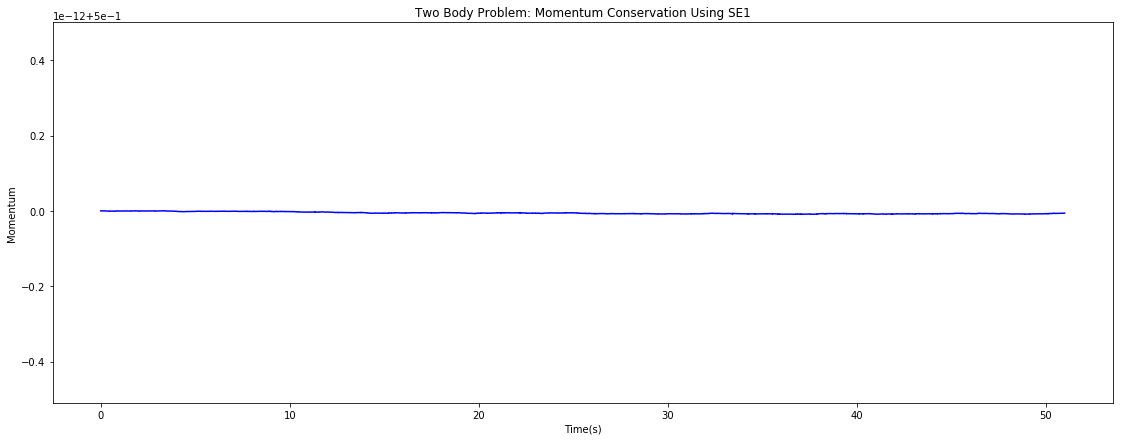

In [41]:
time_array=np.linspace(0, 2255, 2256)

plt.plot(result[3], result[2], color = 'Blue', linestyle = '-')

plt.title('Two Body Problem: Momentum Conservation Using SE1')

plt.xlabel('Time(s)')

plt.ylabel('Momentum')

pylab.savefig('p20.jpg')

In [59]:
 def periodandafinder(x_0, vx_0, y_0, vy_0, Time, dt):
        
    pvector=[x_0,y_0]
    
    vvector=[vx_0,vy_0]
    
    xposition=[]
    
    yposition=[]
    
    xbound=x_0
    
    period=0.1
    
    time_array=np.arange(0,(Time+dt)/dt,dt)
    
    #A check to see in the ellipse path has made it past 0
    
    bool=False
    
    for i in time_array:
        
        if pvector[0]<xbound:
            
            xbound=pvector[0]
            
        if pvector[1]<0:
            
            bool=True
            
        if bool==True and xposition[1]>0:
            
            period=i*2
            
            break
            
        #stepping here, unless the code breaks when the semiminor axis is formed
        
        xposition.append(pvector[0])
        
        yposition.append(pvector[1])
        
        xupdate=pvector[0]+dt*(vvector[0]-dt/2*pvector[0]/((pvector[0]**2+pvector[1]**2)**(3/2)))
        
        yupdate=pvector[1]+dt*(vvector[1]-dt/2*pvector[1]/((pvector[1]**2+pvector[0]**2)**(3/2)))
        
        vvector[0]+= dt*-(pvector[0]/((pvector[0]**2+pvector[1]**2)**(3/2)))
        
        vvector[1]+= dt*-(pvector[1]/((pvector[0]**2+pvector[1]**2)**(3/2)))
        
        pvector=[xupdate, yupdate]
        
    return [(x_0-xbound),period]

In [60]:
periodandafinder(0.5, 0, 0, 0.2, 0.1, 0.01)

[0.5440812633547258, 0.82000000000000006]

In [61]:
def logperiodlogaxis(n):
    
    lnsemiaxislist=[]
    
    lnperiodlist=[]
    
    for i in range(n):
        
        lnsemiaxislist.append(np.log(periodandafinder(0.5, 0, 0, i/35, 0.1, 0.001)[0]))
        
        lnperiodlist.append(np.log(periodandafinder(0.5, 0, 0, i/35, 0.1, 0.001)[1]))
        
    return [lnsemiaxislist,lnperiodlist]

LinregressResult(slope=1.540224892180714, intercept=0.81394219361558073, rvalue=0.99990492387182428, pvalue=6.5821493542484015e-50, stderr=0.0041656154504718578)


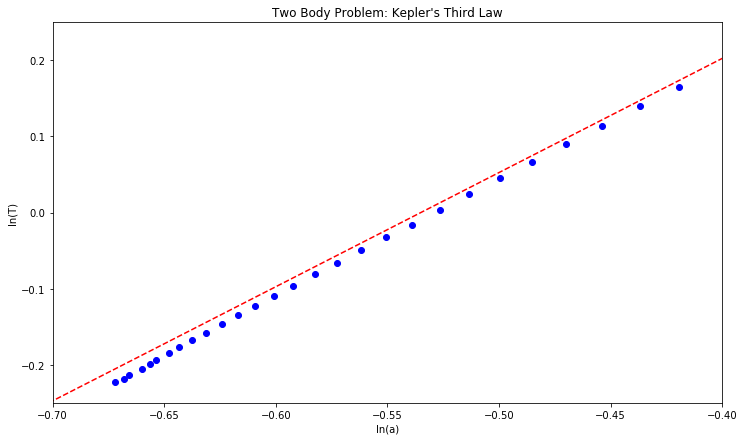

In [62]:
x=logperiodlogaxis(35)[0]

y=logperiodlogaxis(35)[1]

#Chopping off some of the weird, not useful points

del x[0:7]

del y[0:7]

print(linregress(x,y))

plt.rcParams['figure.figsize']=12,7

plt.scatter(x, y, color = 'Blue', linestyle = '-')

plt.axis([-0.7, -0.4, -0.25, 0.25])

plt.title("Two Body Problem: Kepler's Third Law")

plt.xlabel('ln(a)')

plt.ylabel('ln(T)')

x1,x2,n,m,b = -5,5,11,1.5,0.80251450684

x = np.r_[x1:x2:n*1j]

plt.plot(x,m*x + b, color = "Red",linestyle = '--')

pylab.savefig('p21.jpg')

#Note: this changed when I deleted less values, but the chart in the report has different slope